In [1]:
import numpy as np

In [2]:
with open ('demo.txt', 'r') as f:
    a = f.readlines ()
a[:5]

['4 -18 19\n', '3 18 -5\n', '-5 -8 -15\n', '-20 7 -16\n', '10 -13 -7\n']

In [3]:
M = len (a)
b = [[int (x) for x in row.split ()] for row in a]
print (b[:5], M)

[[4, -18, 19], [3, 18, -5], [-5, -8, -15], [-20, 7, -16], [10, -13, -7]] 91


In [4]:
c = {x for row in b for x in row}
print (c, len (c))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1} 40


In [5]:
N = len (c)
d = [[(x + N) % N - (x > 0) for x in row] for row in b]
d[:5]

[[3, 22, 18], [2, 17, 35], [35, 32, 25], [20, 6, 24], [9, 27, 33]]

In [52]:
import time
time.tics = []

def tic ():
    time.tics.append (time.time ())
    
def toc (prefix=''):
    print (prefix + 'Elapsed: {:.2f} sec'.format (time.time () - time.tics.pop ()))

In [51]:
def verify (assignment, clauses):
    return all (any (x in assignment for x in clause) for clause in clauses)

In [69]:
possible = {(min (i, N - i - 1), max (i, N - i - 1)) for i in {x for row in d for x in row}}
possible

{(0, 39),
 (1, 38),
 (2, 37),
 (3, 36),
 (4, 35),
 (5, 34),
 (6, 33),
 (7, 32),
 (8, 31),
 (9, 30),
 (10, 29),
 (11, 28),
 (12, 27),
 (13, 26),
 (14, 25),
 (15, 24),
 (16, 23),
 (17, 22),
 (18, 21),
 (19, 20)}

In [71]:
from itertools import product

valid = []

tic ()
for i, assignment in enumerate (product (*possible)):
    if verify (assignment, d):
        valid.append (assignment)
#         break
toc ()

print ('Valid assignments found after {} iterations: {}.'.format (i+1, len (valid)))
print (*valid, sep='\n')

Elapsed: 8.54 sec
Valid assignments found after 1048576 iterations: 8.
(7, 24, 10, 27, 33, 14, 28, 13, 39, 34, 8, 16, 1, 9, 35, 17, 18, 2, 19, 3)
(7, 24, 29, 12, 33, 14, 28, 13, 0, 34, 31, 16, 38, 9, 35, 22, 21, 37, 19, 3)
(32, 24, 29, 12, 33, 14, 28, 13, 0, 5, 8, 16, 38, 30, 35, 22, 21, 37, 19, 36)
(32, 24, 29, 12, 33, 14, 28, 13, 0, 5, 31, 16, 38, 9, 35, 22, 21, 37, 19, 3)
(32, 24, 29, 12, 33, 14, 28, 13, 0, 5, 31, 16, 38, 30, 35, 22, 21, 37, 19, 3)
(32, 24, 29, 12, 33, 14, 28, 13, 0, 5, 31, 16, 38, 30, 35, 22, 21, 37, 19, 36)
(32, 24, 29, 12, 33, 14, 28, 13, 0, 34, 31, 16, 38, 9, 35, 22, 21, 37, 19, 3)
(32, 24, 29, 27, 33, 14, 28, 13, 0, 5, 8, 16, 38, 30, 35, 22, 21, 37, 19, 36)


In [82]:
found = {int (x) for x in subsets[-1].split (',')}
intersected = [sorted (found & set (x)) for x in valid]
print (subsets[-1])
print (sorted (found))
print (*intersected, sep='\n')

26,37,36,32,14,4,39,15,5,20,1
[1, 4, 5, 14, 15, 20, 26, 32, 36, 37, 39]
[1, 14, 39]
[14, 37]
[5, 14, 32, 36, 37]
[5, 14, 32, 37]
[5, 14, 32, 37]
[5, 14, 32, 36, 37]
[14, 32, 37]
[5, 14, 32, 36, 37]


In [6]:
def plot_matrix (matrix):
    matrix = np.array ([[i,j] for i in range (N) for j in range (N) if matrix[i,j]])
    from matplotlib import pyplot as plt
    plt.scatter (matrix[:,1], -matrix[:,0], c='g')
    plt.gca ().set_aspect (1)
    plt.xlabel ('Column Index', fontsize=12)
    plt.ylabel ('Row Index\n(Don\'t mind the negative)', fontsize=12)
    plt.show ()
    return matrix

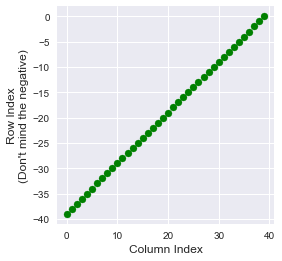

In [7]:
e = np.zeros ([N, N], dtype=bool)
e[range (N), range (N-1,-1,-1)] = 1
plot_matrix (e);

In [8]:
def make_edge (triple):
    triple = sorted (triple)
    from itertools import combinations
    for i,j in combinations (triple, 2):
        e[i,j] = e[j,i] = 1

177 more edges (268) than clauses (91).


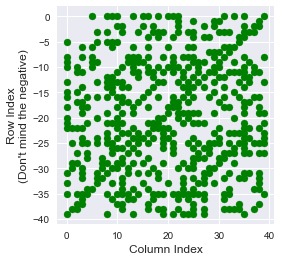

In [9]:
for row in d:
    make_edge (row)
E = (e.sum () - N) // 2 + N
print ('{} more edges ({}) than clauses ({}).'.format (E - M, E, M))
f = plot_matrix (e)

In [10]:
g = {i: {j for j in range (N) if e[i,j]} for i in range (N)}
print (*g.items (), sep='\n')

(0, {33, 35, 5, 39, 8, 9, 10, 13, 15, 16, 18, 20, 21, 22, 31})
(1, {38, 22, 25, 29, 30})
(2, {35, 37, 38, 10, 11, 15, 17, 22, 27, 29})
(3, {32, 35, 36, 37, 6, 8, 11, 14, 17, 18, 19, 22, 24, 25, 30, 31})
(4, {34, 35, 16, 18, 21, 25, 27, 28})
(5, {0, 34, 6, 8, 9, 10})
(6, {32, 33, 3, 5, 9, 13, 16, 20, 24, 25, 31})
(7, {32, 28, 29, 30})
(8, {0, 3, 35, 5, 39, 12, 13, 14, 16, 19, 21, 23, 24, 25, 29, 31})
(9, {0, 33, 36, 5, 6, 12, 13, 14, 15, 21, 25, 26, 27, 30})
(10, {0, 2, 35, 5, 37, 11, 13, 16, 18, 20, 21, 22, 24, 26, 29, 30})
(11, {32, 33, 2, 3, 34, 35, 37, 38, 10, 13, 14, 16, 17, 19, 21, 23, 26, 28, 29})
(12, {35, 36, 8, 9, 14, 17, 23, 25, 27, 30, 31})
(13, {0, 34, 36, 6, 39, 8, 9, 10, 11, 18, 19, 22, 24, 26, 29})
(14, {3, 35, 8, 9, 11, 12, 17, 23, 24, 25, 27, 31})
(15, {0, 33, 2, 9, 16, 24, 29})
(16, {0, 34, 4, 37, 6, 38, 8, 10, 11, 15, 18, 21, 23, 25, 28, 31})
(17, {2, 3, 35, 36, 11, 12, 14, 21, 22, 24, 30})
(18, {0, 32, 3, 4, 35, 38, 10, 13, 16, 20, 21, 22, 31})
(19, {3, 35, 38, 39, 

In [11]:
def bfs (adjacencies, start=None, append_empty=True):
    # Precondition:
    assert adjacencies
    
    # Track remaining unprocessed nodes
    remaining = {x for x in adjacencies.keys ()}
    
    # Decide BFS starting root node
    if start in remaining:
        remaining.remove (start)
    else:
        start = remaining.pop ()
    
    # BFS layers and record of seen nodes
    layers = [{start}]
    seen = {start}
    
    while remaining:
        # Prepare to construct next_layer
        prev_layer = layers[-1]
        next_layer = set ()
        
        # Populate next_layer
        for node in prev_layer:
            next_layer |= adjacencies[node]
        next_layer -= seen
        
        # Record next_layer
        remaining -= next_layer
        seen |= next_layer
        # Note: Append even if next_layer is empty.
        # An empty set will separate layers of
        # different connected components
        layers.append (next_layer)
        
        # Start new connected component
        if not next_layer and remaining:
            if not append_empty:
                layers.pop ()
            start = remaining.pop ()
            seen.add (start)
            layers.append ({start})
        
        # Remove final trailing empty set (applicable iff append_empty option set)
        elif not next_layer:
            layers.pop ()
            
    return layers

In [12]:
h = bfs (g)
print (*h, sep='\n')
len (h)

{0}
{33, 35, 5, 39, 8, 9, 10, 13, 15, 16, 18, 20, 21, 22, 31}
{1, 2, 3, 4, 6, 11, 12, 14, 17, 19, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 36, 37, 38}
{7}


4

In [13]:
gg = {i: {node for node in g[i] if node > i} for i in g}
gg

{0: {5, 8, 9, 10, 13, 15, 16, 18, 20, 21, 22, 31, 33, 35, 39},
 1: {22, 25, 29, 30, 38},
 2: {10, 11, 15, 17, 22, 27, 29, 35, 37, 38},
 3: {6, 8, 11, 14, 17, 18, 19, 22, 24, 25, 30, 31, 32, 35, 36, 37},
 4: {16, 18, 21, 25, 27, 28, 34, 35},
 5: {6, 8, 9, 10, 34},
 6: {9, 13, 16, 20, 24, 25, 31, 32, 33},
 7: {28, 29, 30, 32},
 8: {12, 13, 14, 16, 19, 21, 23, 24, 25, 29, 31, 35, 39},
 9: {12, 13, 14, 15, 21, 25, 26, 27, 30, 33, 36},
 10: {11, 13, 16, 18, 20, 21, 22, 24, 26, 29, 30, 35, 37},
 11: {13, 14, 16, 17, 19, 21, 23, 26, 28, 29, 32, 33, 34, 35, 37, 38},
 12: {14, 17, 23, 25, 27, 30, 31, 35, 36},
 13: {18, 19, 22, 24, 26, 29, 34, 36, 39},
 14: {17, 23, 24, 25, 27, 31, 35},
 15: {16, 24, 29, 33},
 16: {18, 21, 23, 25, 28, 31, 34, 37, 38},
 17: {21, 22, 24, 30, 35, 36},
 18: {20, 21, 22, 31, 32, 35, 38},
 19: {20, 22, 23, 24, 25, 26, 29, 35, 38, 39},
 20: {22, 24, 33},
 21: {23, 25, 26, 27, 35, 39},
 22: {30, 35, 36, 38},
 23: {29, 32, 33, 34, 35, 39},
 24: {25, 30, 35, 36, 39},
 25:

In [37]:
from functools import reduce

def is_valid (combo, registered):
    if not isinstance (combo, set):
        combo = set (combo)
    isdisjoint = combo.isdisjoint
    for i in combo:
        if not isdisjoint (registered[i]):
            return False, None
    
    adjacent = reduce (set.__or__, (registered[i] for i in combo), set ())
    return True, adjacent

In [17]:
from itertools import combinations
from math import factorial

def valid_subsets (layer):
    n = len (layer)
    subsets = []

    tic ()
    for r in range (1, n+1):
        print ('Beginning r={}'.format (r))
        for combo in combinations (layer, r):
            valid, _ = is_valid (combo, gg)
            if valid:
                subsets.append (combo)
        count = factorial (n) // factorial (r) // factorial (n - r)
        print ('Finished r={}. {} combinations checked.'.format (r, count))
        print ('______________________________________________')
    toc ()
    
    return subsets

In [18]:
for layer in h:
    print (len (valid_subsets (layer)))

Beginning r=1
Finished r=1. 1 combinations checked.
______________________________________________
Elapsed: 0.00 sec
1
Beginning r=1
Finished r=1. 15 combinations checked.
______________________________________________
Beginning r=2
Finished r=2. 105 combinations checked.
______________________________________________
Beginning r=3
Finished r=3. 455 combinations checked.
______________________________________________
Beginning r=4
Finished r=4. 1365 combinations checked.
______________________________________________
Beginning r=5
Finished r=5. 3003 combinations checked.
______________________________________________
Beginning r=6
Finished r=6. 5005 combinations checked.
______________________________________________
Beginning r=7
Finished r=7. 6435 combinations checked.
______________________________________________
Beginning r=8
Finished r=8. 6435 combinations checked.
______________________________________________
Beginning r=9
Finished r=9. 5005 combinations checked.
______________

In [19]:
def recursive_bfs (adjacencies, **kwargs):
    # Precondition:
    assert adjacencies
    
    # Run BFS initially to get layers
    layers = bfs (adjacencies, **kwargs)

    # Recursively decompose each BFS layer
    for i, layer in enumerate (layers):
        # Prepare layer-local adjacencies
        # (i.e. restrict edges to nodes within this layer)
        local_adjacencies = {node: adjacencies[node] & layer for node in layer}
        
        # Done if there is only one (or fewer) node
        if len (local_adjacencies) <= 1:
            continue
        
        # Update layer with recursively decomposed result
        else:
            layers[i] = recursive_bfs (local_adjacencies, **kwargs)

    return layers

In [20]:
p = recursive_bfs (g)
print (*p, sep='\n')
len (p)

{0}
[{33}, [{9}, {15}, set(), {20}], [{5}, {10}, [{13}, [{18}, {22}], [{16}, {21}]]], [{8}, [{35}, [{39}, set(), {31}]]]]
[{1}, [{25}, [{29}, {30}, set(), {38}]], [{32}, [{34}, [{11}, {23}], {3}, {6}, set(), {27}], [{2}, [{17}, set(), {37}], [{24}, {14}, {12}], {19}, {26}, {28}, {4}]], {36}]
{7}


4

In [43]:
from operator import mul
from functools import reduce
from itertools import combinations, product
from math import factorial

def recursive_valid_subsets (layers, registered, depth=0):
    indent = '..' * depth
    
    # Return immediately if reached a leaf node
    if len (layers) == 0:
        print (indent + 'Return immediately from depth {}.'.format (depth))
        return ('',), 1
    elif len (layers) == 1:
        print (indent + 'Return immediately from depth {}.'.format (depth))
        return ('{}'.format (*layers),), 1
    
    print (indent + 'Start depth {}.'.format (depth))
    print (indent + '{}.'.format (layers))
    
    # Get all subsets for deeper layers (recursively)
    tic ()
    print (indent + 'Recurse {} deeper layers.'.format (len (layers)))
    layers, num_checked = zip (*(recursive_valid_subsets (layer, registered, depth=depth+1) for layer in layers))
    total = sum (len (layer) for layer in layers)
    print (indent + 'Returning from {} deeper layers. Total number of subsets: {}.'.format (len (layers), total))
    print (indent + 'Product space size: {}.'.format (reduce (mul, (len (layer) for layer in layers), 1)))
    toc (indent)
    
    # Form all compatible new subsets from unions of old subsets (try all combinations from separate layers)
    n = len (layers)
    subsets = [subset for layer in layers for subset in layer]
    tally = count = 0
    length_seen = 1
    append = list.append
    tic ()
    for r in range (2, n+1):
        for layer_indices in combinations (range (n), r):
            for combo in product (*(layers[i] for i in layer_indices)):
                combo = set (s for c in combo for s in c.split (','))
                valid, adjacent = is_valid (combo, registered)
                if valid:
                    key = ','.join (combo)
                    if depth == 0 and len (combo) > length_seen:
                        length_seen = len (combo)
                        append (subsets, key)
                    elif depth > 0:
                        append (subsets, key)
                    tally += 1
                count += 1
    toc (indent)
    
    print (indent + 'End Depth {}.\n'.format (depth) +
           indent + '{} combinations checked.\n'.format (count) +
           indent + 'New subsets formed: {}.\n'.format (tally))
    print (indent[:-2] + '________________________________________________')
           
    return subsets, sum (num_checked) + count

In [24]:
# Note the append_empty option
q = recursive_bfs (g, append_empty=False)
print (*q, sep='\n')
len (q)

{0}
[{33}, [{9}, {15}, {20}], [{5}, {10}, [{13}, [{18}, {22}], [{16}, {21}]]], [{8}, [{35}, [{39}, {31}]]]]
[{1}, [{25}, [{29}, {30}, {38}]], [{32}, [{34}, [{11}, {23}], {3}, {6}, {27}], [{2}, [{17}, {37}], [{24}, {14}, {12}], {19}, {26}, {28}, {4}]], {36}]
{7}


4

In [44]:
registered = {str (k): {str (i) for i in v} for k,v in gg.items ()}
tic ()
subsets, count = recursive_valid_subsets (q, registered=registered)
toc ()
print ('Final result: {} subsets, {} combinations checked.'.format (len (subsets), count))

Start depth 0.
[{0}, [{33}, [{9}, {15}, {20}], [{5}, {10}, [{13}, [{18}, {22}], [{16}, {21}]]], [{8}, [{35}, [{39}, {31}]]]], [{1}, [{25}, [{29}, {30}, {38}]], [{32}, [{34}, [{11}, {23}], {3}, {6}, {27}], [{2}, [{17}, {37}], [{24}, {14}, {12}], {19}, {26}, {28}, {4}]], {36}], {7}].
Recurse 4 deeper layers.
..Return immediately from depth 1.
..Start depth 1.
..[{33}, [{9}, {15}, {20}], [{5}, {10}, [{13}, [{18}, {22}], [{16}, {21}]]], [{8}, [{35}, [{39}, {31}]]]].
..Recurse 4 deeper layers.
....Return immediately from depth 2.
....Start depth 2.
....[{9}, {15}, {20}].
....Recurse 3 deeper layers.
......Return immediately from depth 3.
......Return immediately from depth 3.
......Return immediately from depth 3.
....Returning from 3 deeper layers. Total number of subsets: 3.
....Product space size: 1.
....Elapsed: 0.00 sec
....Elapsed: 0.00 sec
....End Depth 2.
....4 combinations checked.
....New subsets formed: 2.

..________________________________________________
....Start depth 2.
...

In [72]:
bla = sorted (subsets, key=lambda s: len (s.split (',')))
print (len (bla[-1].split (',')))
bla[:-10:-1]

11


['26,37,36,32,14,4,39,15,5,20,1',
 '21,36,28,32,14,33,5,2,19,1',
 '0,36,28,14,6,34,2,19,1',
 '0,26,32,4,12,2,24,1',
 '36,28,14,6,34,2,19,1',
 '0,26,32,4,12,2,24',
 '30,26,36,4,6,38,23',
 '30,26,36,14,4,6,38',
 '26,36,14,4,6,38,29']

In [15]:
def render (bfs_tree, depth=0):
    text = []
    
    # Record seen nodes just to double-check
    seen = set ()

    # Set div orientation and indent level
    indent = '  ' * (depth + 2)
    if depth % 2:
        orientation = 'horizontal'
    else:
        orientation = 'vertical'

    # Render each layer (recursively if needed)
    for i, layer in enumerate (bfs_tree):
        
        # Connected component divider
        if not layer:
            text.append ('{}<div class="break {}"></div>'.format (indent, orientation))
        
        # Node
        elif isinstance (layer, set):
            index, = [x for x in layer]
            text.append ('{}<div id="node_{}" class="node {}">{}</div>'.format (indent, index, orientation, index))
            seen.update (layer)
            
        # Layer (must recurse deeper)
        else:
            rendered, _ = render (layer, depth=depth+1)
            text.append ('{}<div class="layer {}">\n{}\n{}</div>'.format (indent, orientation, rendered, indent))
            seen.update (_)
    
    # Join rendered layers
    text = '\n'.join (text)
    
    # For outermost level, wrap in container, apply stylesheet
    if depth == 0:
        header = '''\
<!DOCTYPE html>
<html>
<head>
  <title>BFS Decomposition Graph Visualization</title>
</head>
<body>\
'''
        canvas = '\t<canvas></canvas>'
        container = '\t<div class="container horizontal">\n{}\n\t</div>'
        style = '\t<link rel="stylesheet" type="text/css" href="bfs_style.css">'
        script = '\t<script type="text/javascript" src="draw_edges.js"></script>'
        footer = '''\
</body>
</html>\
'''
        text = '\n'.join ([header, canvas, container, style, script, footer, '']).format (text)
    
    return text, seen

In [16]:
def head (filename, lines=5, trail=True):
    if lines is None or lines < 0:
        from itertools import count
        lines = count ()
    else:
        lines = range (lines)
        
    with open (filename, 'r') as f:
        for _ in lines:
            text = f.readline ()
            
            if not text:
                trail = False
                break
                
            print (text, end='')
            
    if trail:
        print ('...')

In [17]:
text, seen = render (p)
print (seen)
print ()

with open ('output.html', 'wt') as f:
    f.write (text)
    
head ('output.html', 15)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}

<!DOCTYPE html>
<html>
<head>
  <title>BFS Decomposition Graph Visualization</title>
</head>
<body>
	<canvas></canvas>
	<div class="container horizontal">
    <div id="node_0" class="node vertical">0</div>
    <div class="layer vertical">
      <div id="node_33" class="node horizontal">33</div>
      <div class="layer horizontal">
        <div id="node_9" class="node vertical">9</div>
        <div id="node_15" class="node vertical">15</div>
        <div class="break vertical"></div>
...


In [18]:
import json
with open ('adjacencies.json', 'wt') as f:
    json.dump ({i: sorted (node for node in g[i] if node > i) for i in g}, f, indent=2, sort_keys=True)

head ('adjacencies.json', 20)

{
  "0": [
    5,
    8,
    9,
    10,
    13,
    15,
    16,
    18,
    20,
    21,
    22,
    31,
    33,
    35,
    39
  ],
  "1": [
    22,
...
